---
---
CSCI322: Data Analysis
# **Chicago Crime Data Analysis and Visualization**
###**By: Ahmed Samir, Al Shaimaa Samir, Mohamed Ayman**
Dr. Mustafa El Attar & Eng. Passant Amin
---
---
---

#**--> Problem Definition**
---
Crime analysis has become one of the most important topics in the field of data science, since the availability of crime data sets, in addition to the need of analyzing the reasons of those crime activities and the prediction of future crimes, according to the past criminal records. A lot of online crime datasets are available nowadays, like the city of Atlanta Crime 2009-2017 dataset, city of Baltimore Crime 2011-2016 dataset and many other datasets that can be found here: https://data.world/datasets/crime. Thus, the developers decided to take part in such an intriguing field, which is still open for analysis and research. Moreover, the selection choice of a specific crime sector, needs a decent amount of investigation and research. In addition to a comparison of these various sectors will help the developers find a specific preference.

#**--> Objective**
---
The objective of the project is to answer some questions regarding criminology. Moreover, answering these questions and reaching a well-established analysis, will give us a chance to use these approaches with crimes in other cities also. The developers aim to explore the dataset and find key points that can help in detecting the major areas of crime, factors behind these crimes and safe spots around the city. Moreover, we explore and answer more questions regarding performance indicators of the police in the city and the correlation between socioeconomic factors and crimes in the city. 

---
---

In [ ]:
# Comment:  Imports and Libraries

import os
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

from math import sqrt
from sklearn import preprocessing

%matplotlib inline
plt.style.use('seaborn')
plotColors = (list(mcolors.TABLEAU_COLORS)+list(mcolors.TABLEAU_COLORS)+list(mcolors.TABLEAU_COLORS))[:23]

In [ ]:
# Comment:  Mounting Google Drive

from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


# **I. Data Acquisition**

---

***1. Downloading the Data from Kaggle***

In [ ]:
# Comment:  username, password and api

os.environ['KAGGLE_USERNAME'] = "mohamedaymannaguib"
os.environ['KAGGLE_KEY'] = "0dd4f71b0a733537f687d34026b9a03e"
!kaggle datasets download -d currie32/crimes-in-chicago

**2. Move and Unzip Dataset**

In [ ]:
! mv crimes-in-chicago.zip /content/drive/My\ Drive/Data\ Analysis\ Project
%cd /content/drive/My\ Drive/Data\ Analysis\ Project
! pwd
! unzip crimes-in-chicago.zip
!ls

**3. Load Dataset into Dataframe**

In [ ]:
rangeStarts = [(2005, 2), (2008, 3), (2012, 5)]
crimes = []
path = '/content/drive/My Drive/Data Analysis Project/'
for i, rng in enumerate(rangeStarts):
  file = path + 'Chicago_Crimes_%d_to_%d.csv' % (rng[0], rng[0] + rng[1])
  crimes.append(pd.read_csv(file, error_bad_lines = False))

# Comment: Concatenate the files in one dataframe
allCrimes = pd.concat(crimes, ignore_index = True, axis = 0)


b'Skipping line 533719: expected 23 fields, saw 24\n'
b'Skipping line 1149094: expected 23 fields, saw 41\n'


---
### **II. Data Cleaning**
---

**1. Remove Duplicates**

---

In [ ]:
print("Size of initial Records = %d" % len(allCrimes))

allCrimes.drop_duplicates(subset = "ID", inplace = True)
print("Size of Records After Duplicate Removal = %d" % len(allCrimes))

Size of initial Records = 6017767
Size of Records After Duplicate Removal = 4336556


**2. Remove NaN Values**

---

In [ ]:
allCrimes.dropna(inplace = True)
print("Size of Records After Dropping NaN = %d" % len(allCrimes))

Size of Records After Dropping NaN = 4273756


**3. Remove Undefined Locations**

---

In [ ]:
allCrimes = allCrimes[((allCrimes['X Coordinate'] != 0) & (allCrimes['Y Coordinate'] != 0))]
allCrimes = allCrimes[((allCrimes['Longitude'] != 0) & (allCrimes['Latitude'] != 0))]
print("Size of Records After Dropping Undefined Locations = %d" % len(allCrimes))

Size of Records After Dropping Undefined Locations = 4273583


**4. Create Backup**

---

In [ ]:
backup = allCrimes.copy()


---

## **III. Preprocessing Crime Data**

---

**1. Convert the data format**

---

In [ ]:
allCrimes.Date = pd.to_datetime(allCrimes.Date, format ='%m/%d/%Y %I:%M:%S %p')
allCrimes.index = pd.DatetimeIndex(allCrimes.Date)

**2. Select Most Common Crime Locations and Descriptions**

---

In [ ]:
selectedCategories = 25
print(allCrimes['Location Description'].value_counts())

# Comment:  Find most common
mostFrequentLocations  = list(allCrimes['Location Description'].value_counts()[:selectedCategories].index)
mostFrequentDescription= list(allCrimes['Description'].value_counts()[:selectedCategories].index)

# Comment:  Replace other locations with 'OTHER'
allCrimes.loc[~allCrimes['Location Description'].isin(mostFrequentLocations) , allCrimes.columns=='Location Description'] = 'OTHER'
allCrimes.loc[~allCrimes['Description'].isin(mostFrequentLocations) , allCrimes.columns=='Description'] = 'OTHER'
print(allCrimes['Location Description'].value_counts())

STREET         1069565
RESIDENCE       696477
APARTMENT       481201
SIDEWALK        478192
OTHER           154085
                ...   
LIVERY AUTO          1
FACTORY              1
WOODED AREA          1
POOLROOM             1
COACH HOUSE          1
Name: Location Description, Length: 159, dtype: int64
STREET                            1069565
RESIDENCE                          696477
APARTMENT                          481201
SIDEWALK                           478192
OTHER                              476124
PARKING LOT/GARAGE(NON.RESID.)     119361
ALLEY                               96996
SCHOOL, PUBLIC, BUILDING            89906
RESIDENCE-GARAGE                    84097
VEHICLE NON-COMMERCIAL              76399
SMALL RETAIL STORE                  75120
RESIDENCE PORCH/HALLWAY             73989
RESTAURANT                          64906
RESIDENTIAL YARD (FRONT/BACK)       56020
DEPARTMENT STORE                    52752
GROCERY FOOD STORE                  49901
GAS STATION          

**3. Convert Column Types into Categorical**

---

In [ ]:
allCrimes['Primary Type']         = pd.Categorical(allCrimes['Primary Type'])
allCrimes['Location Description'] = pd.Categorical(allCrimes['Location Description'])
allCrimes['Description']          = pd.Categorical(allCrimes['Description'])

**4. Remove Unnecessary Columns**

---

In [ ]:
allCrimes.drop(['Unnamed: 0', 'Case Number', 'IUCR','Updated On', 'FBI Code', 'Beat',
                'Ward'], inplace = True, axis = 1)

---
# **IV. Data Visualization**

---

**1. Number of Crimes per Month**

---

We want to see How the number of crimes vary per month. We can see there is a pattern that is somehow decreasing over time. It's also in the form of a parabola that peaks and drops down again.

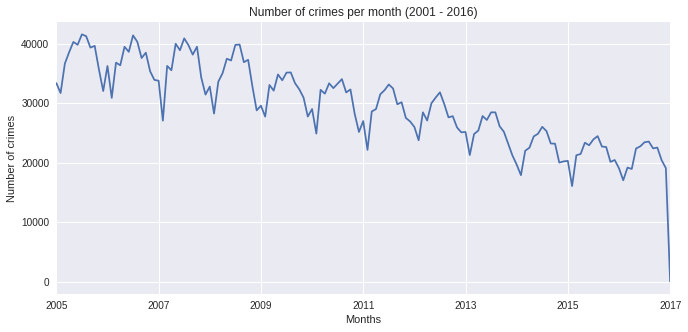

In [ ]:
plt.style.use('seaborn')
plt.figure(figsize=(11,5))
allCrimes.resample('M').size().plot( legend = False )
plt.title('Number of crimes per month (2001 - 2016)')
plt.xlabel('Months')
plt.ylabel('Number of crimes')
plt.show()

**2. Number of Arrests per Month**

---

As we all know, not all guilty individuals get caught. That's why we want to know how many successful arrests the police makes per month. The parabolic shape is still there, and its decreasing too. However, the decrease in the number of arrest does not necessarily indicate a retraction in the police performance, but can be due to the falling down of the number of crimes.

Total Values of Arrests:
 False    3083072
True     1190511
Name: Arrest, dtype: int64


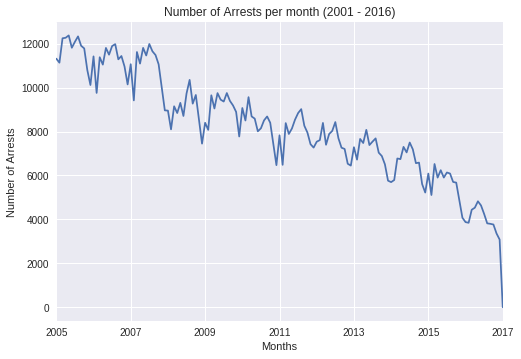

In [ ]:
totalNumOfArrests = allCrimes["Arrest"].value_counts()
print('Total Values of Arrests:\n', totalNumOfArrests)
allCrimes.resample('M')['Arrest'].sum().plot(legend=False)
plt.title('Number of Arrests per month (2001 - 2016)')
plt.xlabel('Months')
plt.ylabel('Number of Arrests')
plt.show()

**3. Plotting the Percentage of Arrests per Month**

---
Here, we want to explore if the performance of the police is actually falling or getting better. This graph tells us the proportion of successfull arrests made relative to the number of crimes. Overall, the performance is somehow constant, falling sometimes and rising sometimes across a baseline of around 0.25 

145
145


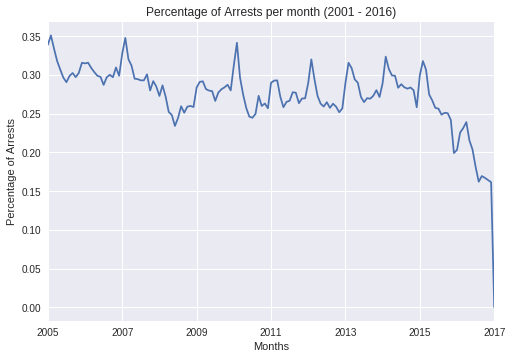

In [ ]:
crimesPerMonthResampler = allCrimes.resample('M').size()
crimesWithArrestResampler = allCrimes.resample('M')['Arrest'].sum()
crimesWithArrestResamplerFloat = crimesWithArrestResampler.astype("float")
print(len(crimesPerMonthResampler))
print(len(crimesWithArrestResampler))
for indx in crimesWithArrestResamplerFloat.index:
  crimesWithArrestResamplerFloat[indx] =  float(crimesWithArrestResampler[indx]) / float(crimesPerMonthResampler[indx])
crimesWithArrestResamplerFloat.plot(legend = False)
plt.title('Percentage of Arrests per month (2001 - 2016)')
plt.xlabel('Months')
plt.ylabel('Percentage of Arrests')
plt.show()

**4. Plotting the Number of Crimes and Arrests per Month**

---
In this plot we want to visualize more the percentage or the proportion of successfull arrests made by the Chicago Police, relative to the total number of crimes in that month. The proportion confirms the baseline mentioned in the previous plot, which is around 25% of the total crimes get arrested.

No handles with labels found to put in legend.


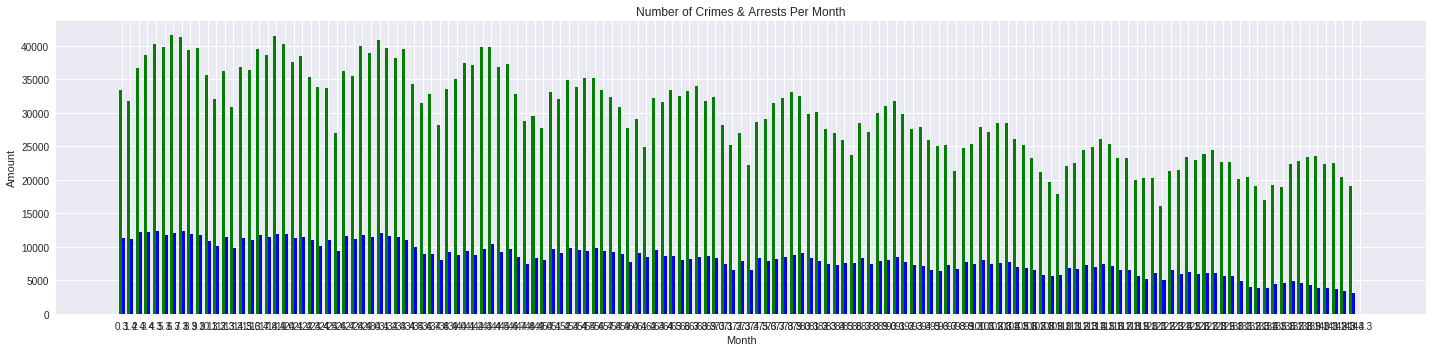

In [ ]:
plt.figure(figsize=(20, 5))
barIndex = np.arange(len(crimesPerMonthResampler))
barWidth = 0.35
crimesWithArrest = allCrimes.loc[allCrimes["Arrest"] == True]
nOfCrimesBar  = plt.bar(barIndex, crimesPerMonthResampler, barWidth, color = 'g', align = 'edge')
nOfArrestsBar = plt.bar(barIndex + barWidth, crimesWithArrestResampler, barWidth, color = 'b', align = 'edge')

plt.xlabel('Month')
plt.ylabel('Amount')
plt.title('Number of Crimes & Arrests Per Month')
plt.xticks(barIndex + barWidth)
plt.legend()
plt.tight_layout()
plt.show()

**5. Rate of Arrests per Crime**

---
As there are over 30 types of identified crime in the city of Chicago, we want to know what typed of crimes are usually arrested. Obviously, personnels caught with narcotics have the highter arrest rate of nearly 39% because the city prohibits narcotics, unlike other cities. Battery -which is an unauthorized or illegal use of force on another person- comes nect with an arrest rate less than half that of narcotics (15%). Other crimes have an arrest rate of 0.08% and less.

Text(0.5, 1.0, 'Rate of Arrests Per Crime')

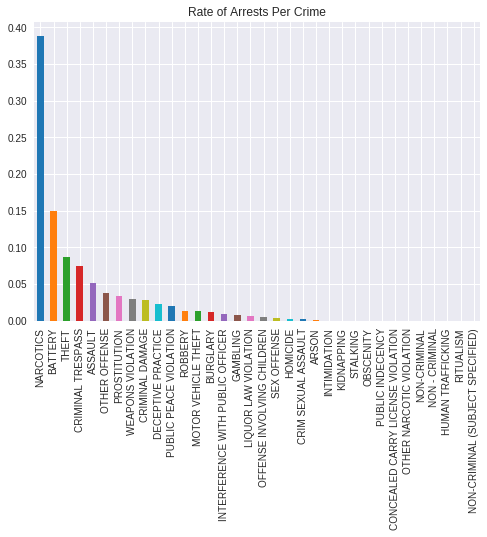

In [ ]:
crimesWithArrest["Primary Type"].value_counts(normalize = True).plot.bar(color = plotColors)
plt.title("Rate of Arrests Per Crime")

**6. Rolling Sum of All Crimes from 2005 - 2016**

---
We want to see how a day in the crime life affects the number of crimes, so we used the rolling sum. It simply sums the crimes in the previous 365 days (1 year), and does this for everyday since 2001. Overall, we can see and conclude that the crime number is dropping almost linearly. 

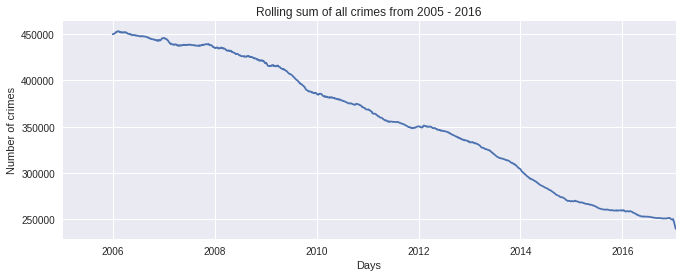

In [ ]:
plt.figure(figsize=(11,4))
allCrimes.resample('D').size().rolling(365).sum().plot()
plt.title('Rolling sum of all crimes from 2005 - 2016')
plt.ylabel('Number of crimes')
plt.xlabel('Days')
plt.show()

**7. Rolling Sum from 2005-2016 for All Crimes**

---

We use the same rolling sum approach for all the crime types. Liquor law violation, narcotics, offense involving children, prostitution, sex offense and theft are clearly decreasing over the years, and are expected to complete this way. However, obscenity and non-criminal acts are actually going up. Other crimes are not following a defined direction and are oscillating.


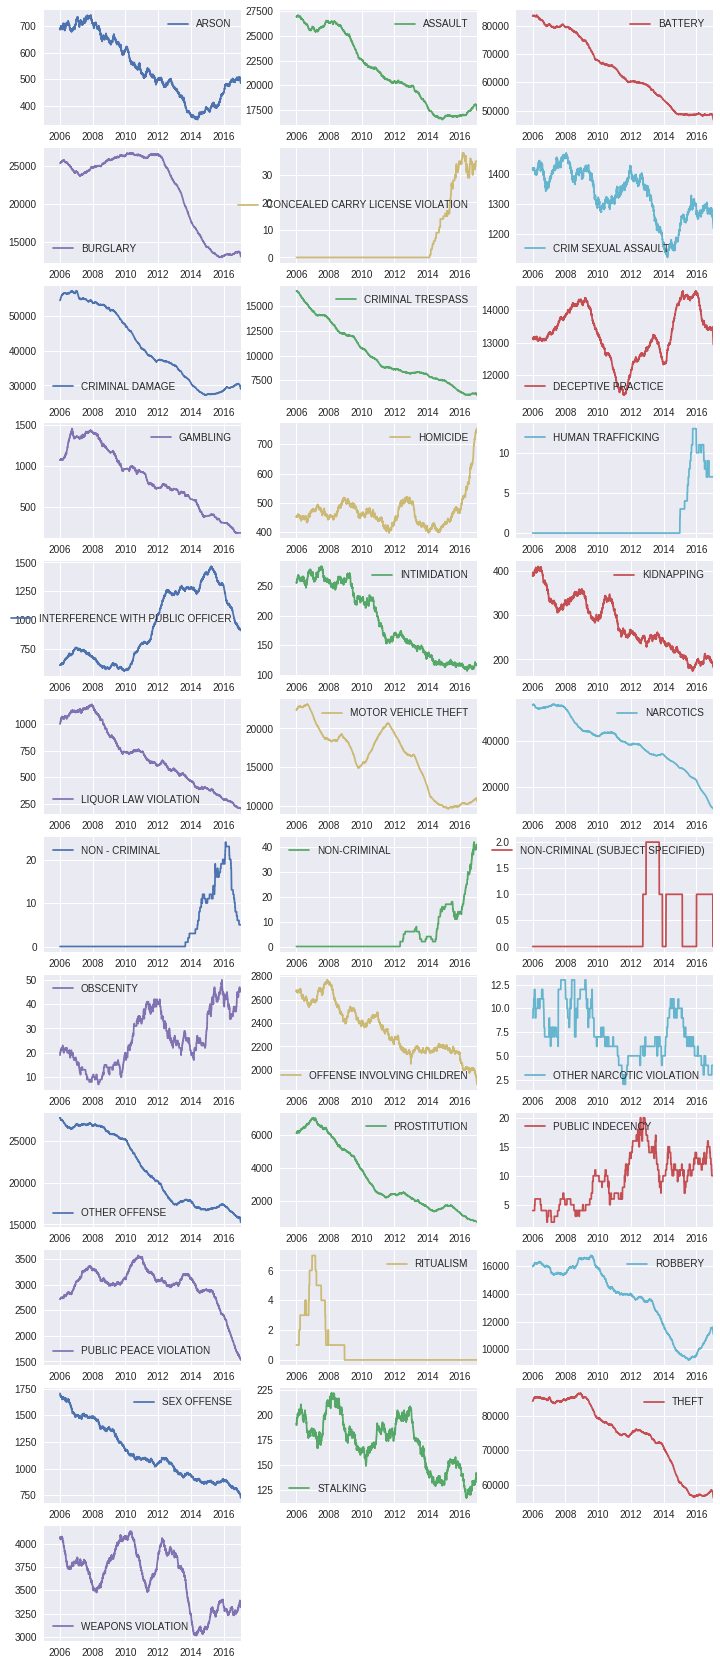

In [ ]:
crimes_count_date = allCrimes.pivot_table('ID', aggfunc=np.size, columns='Primary Type', index=allCrimes.index.date, fill_value = 0)
crimes_count_date.index = pd.DatetimeIndex(crimes_count_date.index)
plo = crimes_count_date.rolling(365).sum().plot( figsize = (12, 30), subplots = True, layout = (-1, 3), sharex = False, sharey = False )


**8. Number of Crimes by Days of the Week**

---
We next try to see our data plotted by days of the week, to find if there is a specific pattern. Crimes peak on Fridays, and hit the bottom on Sundays. As we know, Chicago is dominated by Christians, and they go to churches on Sunday. This might explain the low rates of crime.

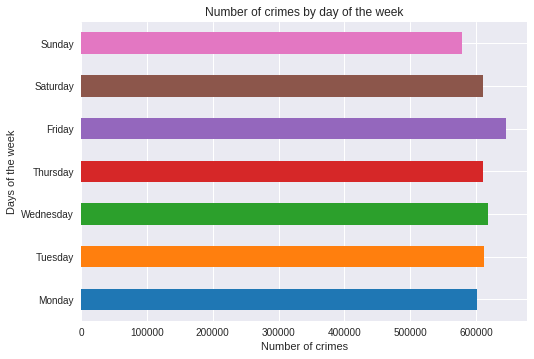

In [ ]:
days = ['Monday','Tuesday','Wednesday',  'Thursday', 'Friday', 'Saturday', 'Sunday']
allCrimes.groupby([allCrimes.index.dayofweek]).size().plot(kind='barh', color=plotColors)
plt.ylabel('Days of the week')
plt.yticks(np.arange(7), days)
plt.xlabel('Number of crimes')
plt.title('Number of crimes by day of the week')
plt.show()

**9. Number of Crimes by Month of the Year**

---

The next plot is to find the relation between the month of the year, and the number of crimes. The crimes peak in June, which is the summer, and plunge in February and December, which are winter months.

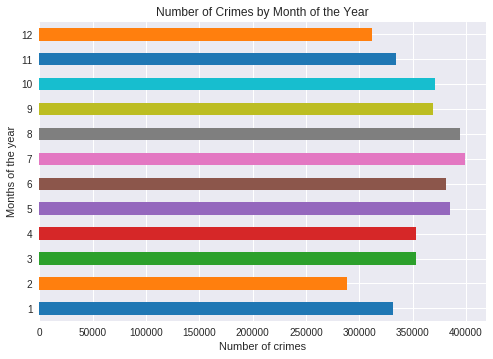

In [ ]:
allCrimes.groupby([allCrimes.index.month]).size().plot(kind='barh', color=plotColors)
plt.ylabel('Months of the year')
plt.xlabel('Number of crimes')
plt.title('Number of Crimes by Month of the Year')
plt.show()

**10. Number of Crimes by Type**

---

In this section, we try to relate the crime number to the crime type. As we see, the most common types are theft and battery. Criminal damage comes next then narcotics. However, the highest arrest rate are in narcotics which comes in the 4th place here.

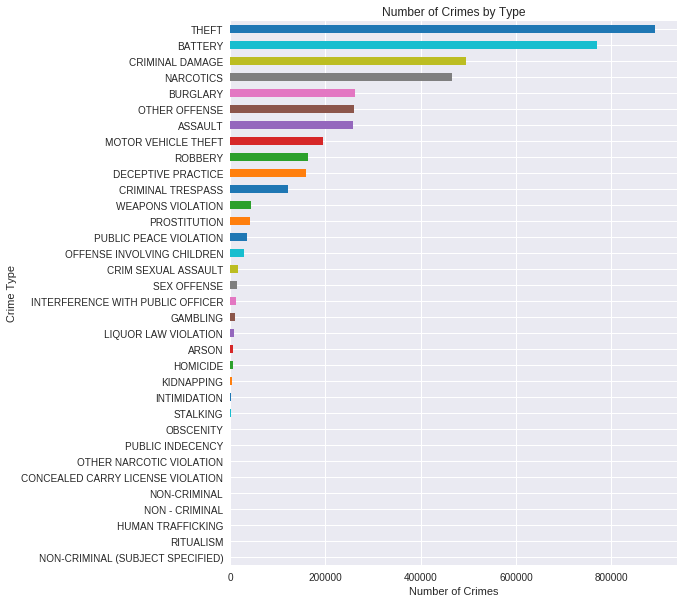

In [ ]:
plt.figure(figsize=(8,10))
allCrimes.groupby([allCrimes['Primary Type']]).size().sort_values(ascending=True).plot(kind='barh', color=plotColors)
plt.title('Number of Crimes by Type')
plt.ylabel('Crime Type')
plt.xlabel('Number of Crimes')
plt.show()

**11. Number of Crimes by Location**

---

We try to find the most common places where crimes are most likely to occur. Streets come first of course, and this also coincides with the fact that theft is the most common crime, and it apparently occurs in the street. Next, are residence places in which burglary is most common.

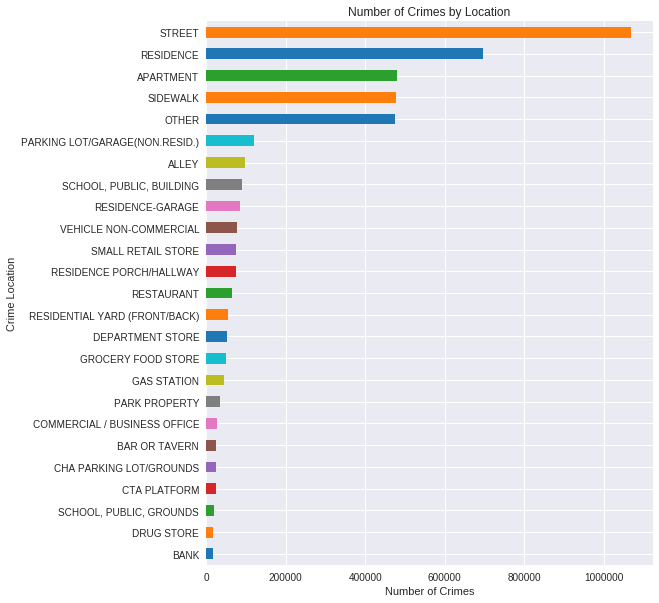

In [ ]:
plt.figure(figsize=(8,10))
allCrimes.groupby([allCrimes['Location Description']]).size().sort_values(ascending=True).plot(kind='barh', color=plotColors)
plt.title('Number of Crimes by Location')
plt.ylabel('Crime Location')
plt.xlabel('Number of Crimes')
plt.show()

**12. Number of Crimes by Location**

---

This graph visualizes the density of crime better. It shows the map of Chicago, and the color codes indicate which crime type is most common in this area of Chicago.


<Figure size 1440x1440 with 0 Axes>

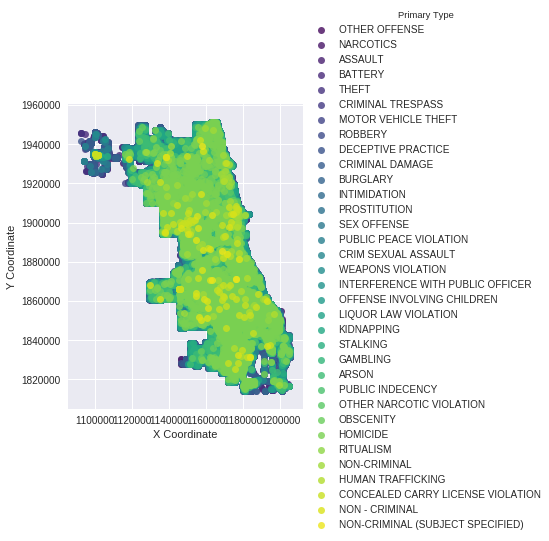

In [ ]:
newCopy = backup.copy()

plt.figure(figsize=(20, 20))

sns.lmplot(data = newCopy, x = 'X Coordinate', y = 'Y Coordinate', hue = 'Primary Type', palette = 'viridis', fit_reg = False)
plt.show()

**13. Crime Types by Police Districts**

---

The following set of pie charts shows the portion of each crime type in every police district in Chicago. There are 24 known police districts, and thats why there are 24 pie charts too!

IndexError: ignored

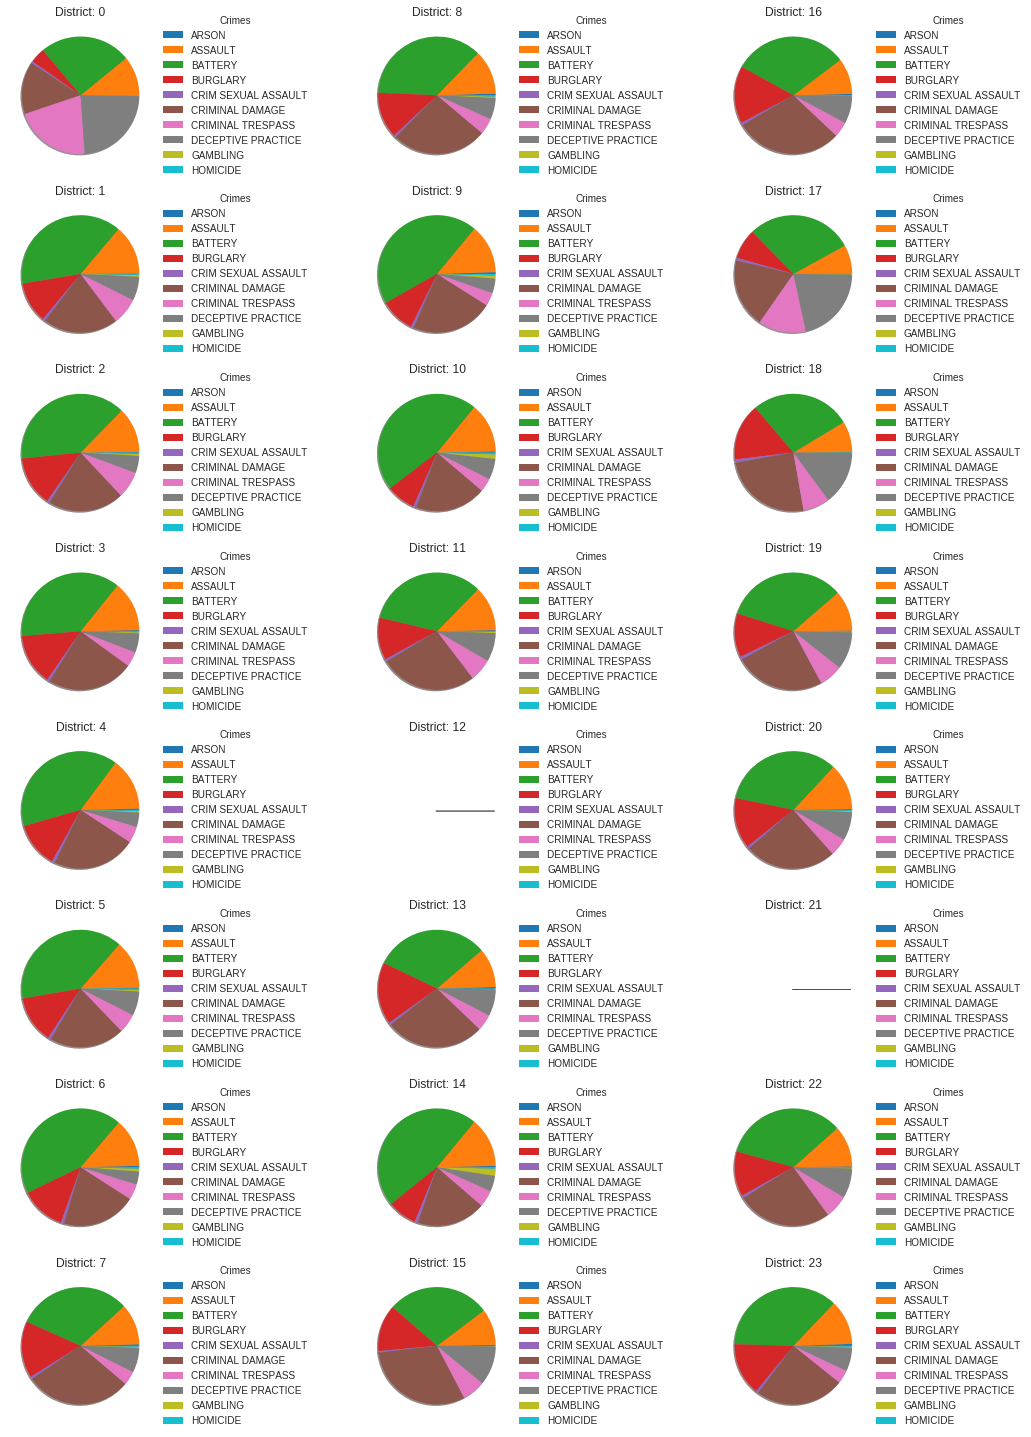

In [ ]:


crimes_by_area = allCrimes.pivot_table(index="District", values="ID", columns="Primary Type", aggfunc=np.size, fill_value=0)
crimes_by_area = crimes_by_area.drop(columns = ["CONCEALED CARRY LICENSE VIOLATION"])
crimes_by_area = crimes_by_area.iloc[:, :10]

labels = crimes_by_area.columns


fig, ax = plt.subplots(8, 3)
fig.set_figheight(20)
fig.set_figwidth(15)
fig.tight_layout()
x_axis_counter = 0
y_axis_counter = 0
for i in range(len(crimes_by_area)):
  if(x_axis_counter == 8):
    y_axis_counter += 1
    x_axis_counter = 0
  plt.sca(ax[x_axis_counter, y_axis_counter])
  wed, text = plt.pie(crimes_by_area.iloc[i,:], shadow = True, colors = plotColors, textprops = dict(color="w"))
  ax[x_axis_counter, y_axis_counter].legend(wed, labels,
          title="Crimes",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))
  ax[x_axis_counter, y_axis_counter].set_title(f"District: {i}")
  x_axis_counter += 1


  

plt.show()


---
# **V. Studying Correlation**
---

In this section, we will be studying the Pearson correlation coefficient between the number of crimes and some socioeconomic Indicators. We will use another dataset from Kaggle that has the socioeconomic indicators of Chicago, listed by community areas. There are 77 known community areas in Chicago.  

**1. Acquiring the Data**

---
**Data Description:** This dataset contains a selection of six socioeconomic indicators of public health significance and a “hardship index,” by Chicago community area, for the years 2001 – 2017. The indicators are the percent of occupied housing units with more than one person per room (i.e.,crowded housing); the percent of households living below the federal poverty level; the percent of
persons aged 16 years or older in the labor force that are unemployed; the percent of persons aged 25 years or older without a high school diploma; the percent of the population under 18 or over 64 years of age (i.e., dependency); and per capita income. 

In [ ]:
# Reading Public Health Indicators file

file = path + '6PublicHealthIndicators_Chicago.csv'
phiData =  pd.read_csv(file, error_bad_lines = False)

**2. Preporcessing the Data**

---
The city of Chicago has 77 community areas. In the preprocessing step, we just want to take the data from the first dataset (crime dataset) to calculate how many crimes are there per community area.


In [ ]:
phiData = phiData[:][:77]
communityAreas = []
for i in range(77):
  temp = float(i)
  number = (allCrimes['Community Area'] == temp).sum()

  communityAreas.append(number)
phiData['Crime Number'] = communityAreas

In [ ]:
# Comment:  Normalizes the values between 0 and 1

def Normalize(feature1, feature2):
  max_value = phiData[feature1].max()
  min_value = phiData[feature1].min()  
  x = (phiData[feature1] - min_value) / (max_value - min_value)
  max_value = phiData[feature2].max()
  min_value = phiData[feature2].min()  
  y = (phiData[feature2] - min_value) / (max_value - min_value)
  return x, y

# Comment:  Plots a feature Vs. Crime Number

def plot(feature, x, y):
  plt.scatter(x, y)
  plt.title(feature + ' Vs. Crime Number')
  plt.xlabel(feature)
  plt.ylabel('Crime Number')
  plt.show()

**3. Data Visualization and Correlation**

---

### A. Correlation between Percent of Housing Crowded and CRIME Number

Occupied housing units with more than one person per room are considered crowded.



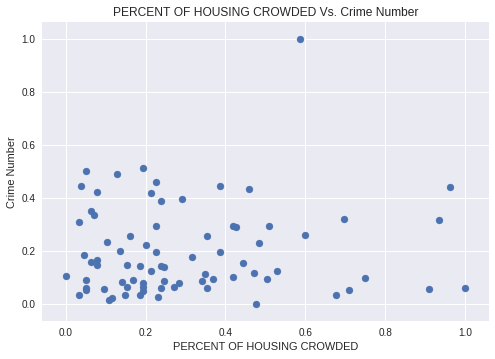

********************************************************************************


,PERCENT OF HOUSING CROWDED,Crime Number
PERCENT OF HOUSING CROWDED,1.00000,0.07008
Crime Number,0.07008,1.00000


In [ ]:
feature = 'PERCENT OF HOUSING CROWDED'

x, y = Normalize(feature, 'Crime Number')

# PLOTTING
plot(feature, x, y)
print(80*'*')

# CORRELATION COEFFICIENT
phiData[[feature, 'Crime Number']].corr()

### B. Correlation between PERCENT HOUSEHOLDS BELOW POVERTY and CRIME NUMBER

Below Poverty Line is a benchmark used by the governments to indicate economic disadvantage and to identify individuals and households in need of government assistance and aid.


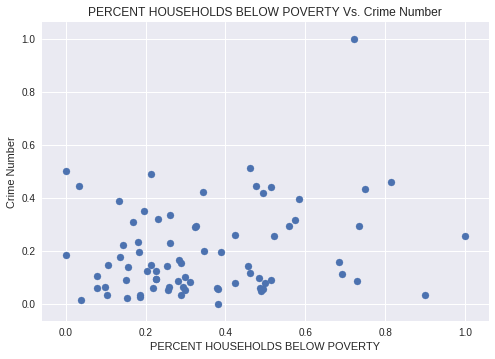

********************************************************************************


,PERCENT HOUSEHOLDS BELOW POVERTY,Crime Number
PERCENT HOUSEHOLDS BELOW POVERTY,1.00000,0.23057
Crime Number,0.23057,1.00000


In [ ]:
feature = 'PERCENT HOUSEHOLDS BELOW POVERTY'

x, y = Normalize(feature, 'Crime Number')

# PLOTTING
plot(feature, x, y)
print(80*'*')

# CORRELATION COEFFICIENT
phiData[[feature, 'Crime Number']].corr()

### C. Correlation between PERCENT AGED 16+ UNEMPLOYED and CRIME NUMBER

The unemployment rate is the number of unemployed people divided by the number of people in the labor force.

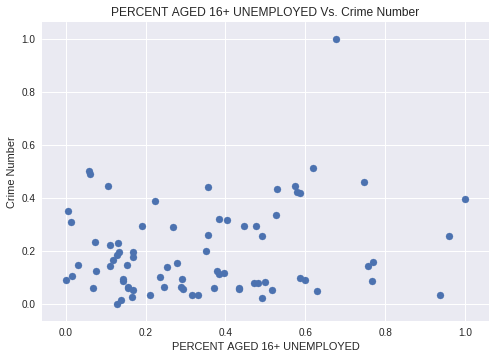

********************************************************************************


,PERCENT AGED 16+ UNEMPLOYED,Crime Number
PERCENT AGED 16+ UNEMPLOYED,1.000000,0.190578
Crime Number,0.190578,1.000000


In [ ]:
feature = 'PERCENT AGED 16+ UNEMPLOYED'

x, y = Normalize(feature, 'Crime Number')

# PLOTTING
plot(feature, x, y)
print(80*'*')

# CORRELATION COEFFICIENT
phiData[[feature, 'Crime Number']].corr()

### D. Correlation between PERCENT AGED 25+ WITHOUT HIGH SCHOOL DIPLOMA and CRIME NUMBER

Percent of people skipping high school.

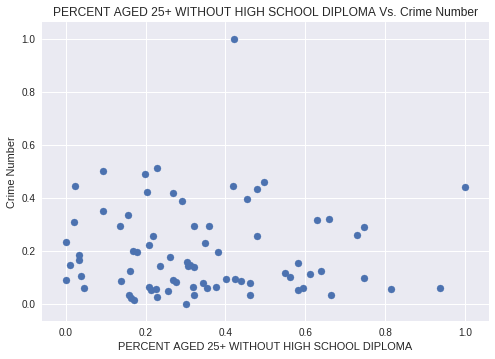

********************************************************************************


,PERCENT AGED 25+ WITHOUT HIGH SCHOOL DIPLOMA,Crime Number
PERCENT AGED 25+ WITHOUT HIGH SCHOOL DIPLOMA,1.000000,-0.008095
Crime Number,-0.008095,1.000000


In [ ]:
feature = 'PERCENT AGED 25+ WITHOUT HIGH SCHOOL DIPLOMA'

x, y = Normalize(feature, 'Crime Number')

# PLOTTING
plot(feature, x, y)
print(80*'*')

# CORRELATION COEFFICIENT
phiData[[feature, 'Crime Number']].corr()

### E. Correlation between PERCENT AGED UNDER 18 OR OVER 64 and CRIME NUMBER

A dependant individual is a person who relies on another as a primary source of income, as those below 18 or over 64.

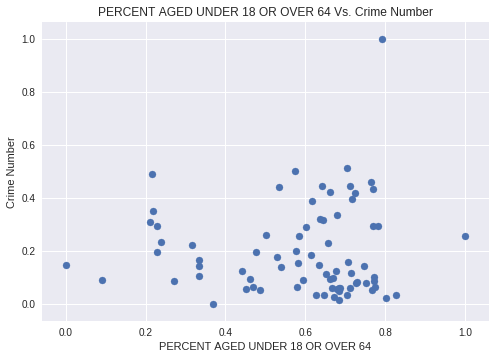

********************************************************************************


,PERCENT AGED UNDER 18 OR OVER 64,Crime Number
PERCENT AGED UNDER 18 OR OVER 64,1.00000,0.03424
Crime Number,0.03424,1.00000


In [ ]:
feature = 'PERCENT AGED UNDER 18 OR OVER 64'

x, y = Normalize(feature, 'Crime Number')

# PLOTTING
plot(feature, x, y)
print(80*'*')

# CORRELATION COEFFICIENT
phiData[[feature, 'Crime Number']].corr()

### F. Correlation between PER CAPITA INCOME  and CRIME NUMBER

Per capita income (PCI) or average income measures the average income earned per person in a given area (city, region, country, etc.) in a specified year. It is calculated by dividing the area's total income by its total population.

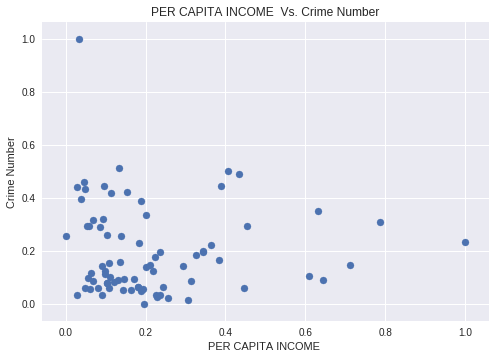

********************************************************************************


,PER CAPITA INCOME,Crime Number
PER CAPITA INCOME,1.000000,-0.018864
Crime Number,-0.018864,1.000000


In [ ]:
feature = 'PER CAPITA INCOME '

x, y = Normalize(feature, 'Crime Number')

# PLOTTING
plot(feature, x, y)
print(80*'*')

# CORRELATION COEFFICIENT
phiData[[feature, 'Crime Number']].corr()

### G. Correlation between HARDSHIP INDEX and CRIME NUMBER

Indicators of economic hardship have been developed into an index to measure their economic conditions of Chicago Community Areas. This economic hardship index utilizes multiple indicators to provide a more comprehensive view of economic hardship than single indicators.

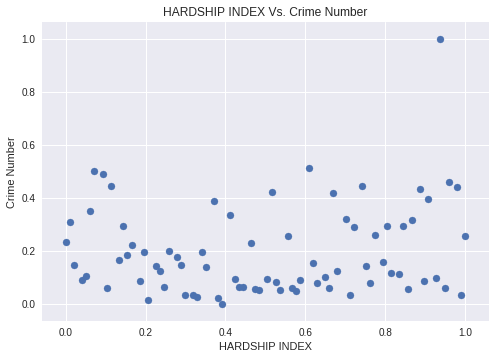

********************************************************************************


,HARDSHIP INDEX,Crime Number
HARDSHIP INDEX,1.000000,0.140325
Crime Number,0.140325,1.000000


In [ ]:
feature = 'HARDSHIP INDEX'

x, y = Normalize(feature, 'Crime Number')

# PLOTTING
plot(feature, x, y)
print(80*'*')

# CORRELATION COEFFICIENT
phiData[[feature, 'Crime Number']].corr()

---
# **VI. Clustering Data**
---
In this section, we want to study the location of crimes (in 2016), and cluster each crime with its nearest police station. We used another dataset from Chicago Data Portal to find all police stations in Chicago with their locations. Next, we see the police station with the maximum intra-cluster distance and suggest dividing it into two stations.

**1. Data Acquisition**

---
**Data Description:** Chicago Police district station locations and contact information. Data provided by Chicago Police Department.


In [ ]:
# Police Station Data Set

file = '/content/drive/My Drive/Data Analysis Project/Police_Stations.csv'
polData = pd.read_csv(file)


**2. Data Sampling**

---
Sample one thousand records from the year 2016 crimes (to be easier to manipulate).


In [ ]:
samplesNo = 1000
trunData = allCrimes.copy()
trunData = trunData[allCrimes['Year'] ==  2016]
trunData = trunData.sample(n = samplesNo, random_state = 1)

trunData.shape

(1000, 16)

In [ ]:
# Function that Calculates the Euclidean Distance

def dist(x1, y1, x2, y2):
  return sqrt( (x1 - x2)**2 + (y1 - y2)**2 )

**3. Clustering**

---

The city of Chicago has 23 police stations. In this section, we calculate the Euclidean distance from each crime location to each police station, and find the nearest station to each point.

In [ ]:
minDis, nearestStation, color = [], [], []

# Comment:  Clear arrays
for i in range(trunData.shape[0]):
  minDis.append(1000000000000000000)
  nearestStation.append(-1)
  color.append('r')

for i in range(polData.shape[0]):
  arr = []
  for j in range(trunData.shape[0]):
    idx1 = list(trunData.columns).index('X Coordinate')
    x1 = trunData.iloc[j, idx1]
    y1 = trunData.iloc[j, idx1+1]
    idx2 = list(polData.columns).index('X COORDINATE')
    x2 = polData.iloc[i, idx2]
    y2 = polData.iloc[i, idx2+1]
    d = dist(x1, y1, x2, y2)
    arr.append(d)
    if(d < minDis[j]):
      minDis[j] = d
      nearestStation[j] = i
      color[j] = plotColors[i]
  trunData['Dist to Police Station No.' + str(i)] = arr
trunData['Nearest Station'] = nearestStation  
trunData['Dist to Nearest Police Station'] = minDis
trunData['Color'] = color

**4. Results and Visualization**

---

### A. Plotting the Whole Dataset before Clustering

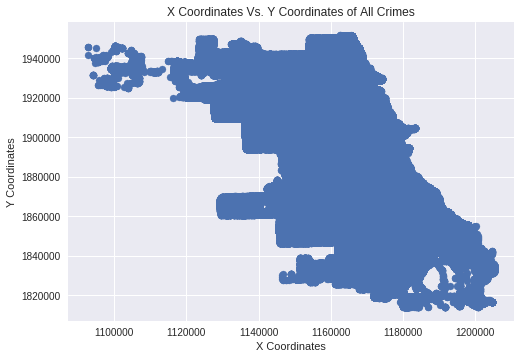

In [ ]:
# Plotting X against Y Coordinates of all crimes

plt.scatter(allCrimes['X Coordinate'], allCrimes['Y Coordinate'])
plt.xlabel('X Coordinates')
plt.ylabel('Y Coordinates')
plt.title('X Coordinates Vs. Y Coordinates of All Crimes')
plt.show()

### B. Plotting the Sampled Dataset of 2016 before Clustering

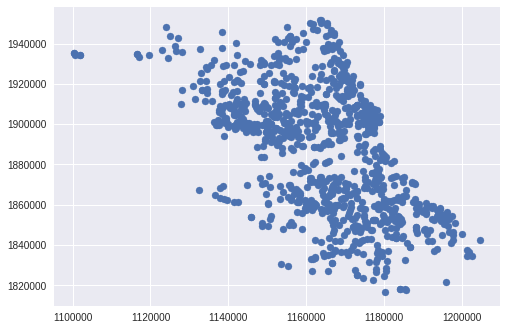

In [ ]:
plt.scatter(trunData['X Coordinate'], trunData['Y Coordinate'])T

### C. Data after Clustering

In [ ]:
trunData

,ID,Date,Block,Primary Type,Description,Location Description,Arrest,Domestic,District,Community Area,X Coordinate,Y Coordinate,Year,Latitude,Longitude,Location,Dist to Police Station No.0,Dist to Police Station No.1,Dist to Police Station No.2,Dist to Police Station No.3,Dist to Police Station No.4,Dist to Police Station No.5,Dist to Police Station No.6,Dist to Police Station No.7,Dist to Police Station No.8,Dist to Police Station No.9,Dist to Police Station No.10,Dist to Police Station No.11,Dist to Police Station No.12,Dist to Police Station No.13,Dist to Police Station No.14,Dist to Police Station No.15,Dist to Police Station No.16,Dist to Police Station No.17,Dist to Police Station No.18,Dist to Police Station No.19,Dist to Police Station No.20,Dist to Police Station No.21,Dist to Police Station No.22,Nearest Station,Dist to Nearest Police Station,Color
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2016-05-01 09:21:00,10505633,2016-05-01 09:21:00,026XX W MARQUETTE RD,OTHER OFFENSE,OTHER,RESIDENCE,False,True,8.0,66.0,1159958.0,1860124.0,2016,41.771886,-87.689200,"(41.77188602, -87.689199969)",35742.190994,14224.456899,37323.633643,76608.646935,27951.843289,83183.306360,19356.727889,8222.663167,57373.777744,31340.290184,44924.072637,22852.678245,54422.252289,5955.387258,40385.897472,75680.882126,49470.673973,34336.804198,26570.323502,29854.921000,36967.480969,71545.576551,64777.746335,13,5955.387258,tab:red
2016-02-17 16:50:00,10417142,2016-02-17 16:50:00,005XX N LAWNDALE AVE,NARCOTICS,OTHER,RESIDENCE,True,False,11.0,23.0,1151625.0,1903341.0,2016,41.890646,-87.718613,"(41.890646342, -87.718612801)",27496.442317,54393.843865,7172.277084,33046.051818,33911.493936,41793.079984,40293.778269,43405.615737,16348.324141,12685.752278,14040.880001,54728.302049,12504.682637,40775.820081,78178.851007,33147.405119,20998.291309,19582.858061,27630.212551,73867.485001,78550.589430,27600.529831,27590.975447,2,7172.277084,tab:green
2016-03-06 22:30:00,10439024,2016-03-06 22:30:00,041XX W 58TH PL,CRIMINAL DAMAGE,OTHER,OTHER,False,False,8.0,62.0,1149787.0,1865490.0,2016,41.786814,-87.726345,"(41.786814171, -87.726345227)",37523.409686,25719.749545,32125.634161,69101.696775,32304.326207,79033.542130,26685.795485,18044.096398,49201.539653,25927.592225,35850.703214,33723.697791,49564.915248,5555.907603,51819.621804,70824.388424,48077.471382,33583.064533,28541.989386,38171.585819,47763.672714,65317.866743,61967.402896,13,5555.907603,tab:red
2016-01-08 17:40:00,10372828,2016-01-08 17:40:00,094XX S NORMAL AVE,BATTERY,OTHER,RESIDENCE,True,True,22.0,73.0,1174623.0,1842363.0,2016,41.722834,-87.635970,"(41.722833628, -87.635970445)",49447.013553,10913.459214,58112.149484,98191.090395,39457.033528,101374.318253,28817.522750,21785.493740,79609.432873,52621.786627,67701.405931,17900.444120,74168.821459,28537.170009,19244.710085,94824.039159,65772.704847,51388.996849,41843.445565,14488.440415,13935.907422,92118.682058,81943.488071,1,10913.459214,tab:orange
2016-06-08 23:00:00,10553307,2016-06-08 23:00:00,081XX S PRINCETON AVE,THEFT,OTHER,RESIDENTIAL YARD (FRONT/BACK),False,False,6.0,44.0,1175702.0,1850952.0,2016,41.746379,-87.631762,"(41.746378903, -87.631761752)",40828.911494,3997.129841,50523.926147,90697.918179,30812.308183,92962.500709,20202.409266,14490.461050,72587.624673,45300.927989,61297.316992,10187.048271,66139.782035,24159.872768,22269.444556,86583.345987,57249.217020,43041.343725,33406.184022,22396.038493,20920.325081,84245.053635,73451.436856,1,3997.129841,tab:orange
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-03-28 21:55:00,10465400,2016-03-28 21:55:00,047XX S WESTERN AVE,PUBLIC PEACE VIOLATION,OTHER,OTHER,False,False,9.0,58.0,1161162.0,1873367.0,2016,41.808202,-87.684420,"(41.808201741, -87.684420054)",24002.299487,23185.548728,24507.014877,64418.488224,18545.637770,69898.174191,14868.486074,12230.056786,45906.

### D. Plotting the Clustered Data

Each color represents a police station with its neighboring crime locations.

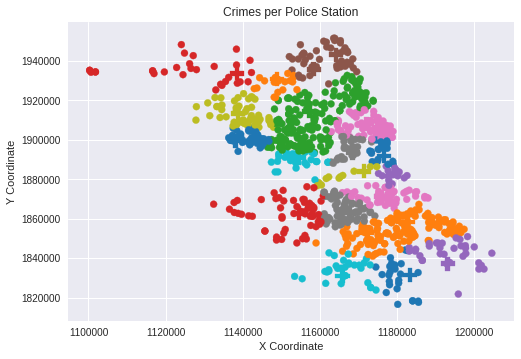

In [ ]:
plt.scatter(polData['X COORDINATE'], polData['Y COORDINATE'], color = plotColors, marker = 'P', s = 200)
plt.scatter(trunData['X Coordinate'], trunData['Y Coordinate'], color = trunData['Color'])
plt.title('Crimes per Police Station')
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.show()

### E. Finding the Police Station with the max IntraCluster Distance

In [ ]:
# Find the Police Station with the greatest intracluster distance
trunData = trunData.sample(100,  random_state = 1)

intraClusterDist = []
for i in range(polData.shape[0]):
  intraClusterDist.append(0)

idx  = list(trunData.columns).index('Nearest Station')
idx1 = list(trunData.columns).index('X Coordinate')

for i in range(trunData.shape[0]):
  for j in range(trunData.shape[0]):
    st1 = trunData.iloc[i , idx]
    st2 = trunData.iloc[j , idx]
    if(st1 == st2):
      station = st1
      x1 = trunData.iloc[j, idx1]
      y1 = trunData.iloc[j, idx1+1]
      x2 = trunData.iloc[i, idx1]
      y2 = trunData.iloc[i, idx1+1]
      d = dist(x1, y1, x2, y2)
      intraClusterDist[station] = max(intraClusterDist[station], d)
mx = max(intraClusterDist)

In [ ]:
# The max intra-cluster distances in all clusters

intraClusterDist

[13095.190911170406,
 22049.078461468634,
 17785.524957110487,
 41947.71519403649,
 9696.438933959209,
 20014.216247457705,
 22378.720651547534,
 18072.44225333145,
 22595.327946281282,
 16631.358633617398,
 12181.503519680975,
 20367.744229540982,
 18057.72189397101,
 29809.62222169211,
 29237.765321583658,
 17192.94823466877,
 17112.778529508294,
 14692.779246963455,
 18191.259687003538,
 22444.540650233856,
 27653.6166531613,
 12636.590046369312,
 16670.09900990393]

In [ ]:
# Get the index of the cluster with the max intra-cluster distance

bigCluss = intraClusterDist.index(mx)

In [ ]:
# Color the cluster with the max intra-cluster distance in BLACK

plotColors2 = plotColors.copy()
plotColors2[bigCluss] = 'black'
cols = []
idx = list(trunData.columns).index('Nearest Station')
idx1 = list(trunData.columns).index('Color')
for i in range(trunData.shape[0]):
  if(trunData.iloc[i , idx] == bigCluss):
    cols.append('black')
  else:
    cols.append(trunData.iloc[i,idx1])


### F. Plot the Clustered Dataset with the Police Station that has max Intra Cluster Distance in Black

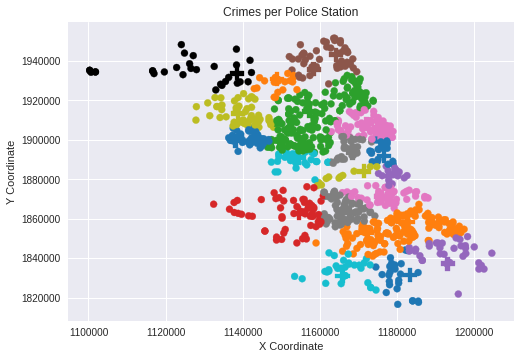

In [ ]:
plt.scatter(polData['X COORDINATE'], polData['Y COORDINATE'], color = plotColors2, marker = 'P', s = 200)
plt.scatter(trunData['X Coordinate'], trunData['Y Coordinate'], color = cols)
plt.title('Crimes per Police Station')
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.show()